In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [75]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [76]:
## Helper functions
def std_deviation(x_arr) -> float:
    mean = np.mean(x_arr)
    std_dev = 0
    for val in x_arr:
        std_dev += np.power(val - mean, 2)
    return np.sqrt(1.0/(len(x_arr) - 1) * std_dev)

def std_error(x_arr) -> float:
    return std_deviation(x_arr) / np.sqrt(len(x_arr))

In [77]:
FILENAME = "../Data/Exercise_5.txt"
data = np.loadtxt(fname=FILENAME, dtype=float)

n_keys = data[:,0].astype(int)
fast_4_independent = data[:,1].astype(float)
slow_4_independent = data[:,2].astype(float)
multiply_shift = data[:,3].astype(float)

fast_4_independent_avg = np.mean(fast_4_independent)
fast_4_independent_std_err =std_error(fast_4_independent)

slow_4_independent_avg = np.mean(slow_4_independent)
slow_4_independent_std_err =std_error(slow_4_independent)

multiply_shift_avg = np.mean(multiply_shift)
multiply_shift_avg_std_err = std_error(multiply_shift)



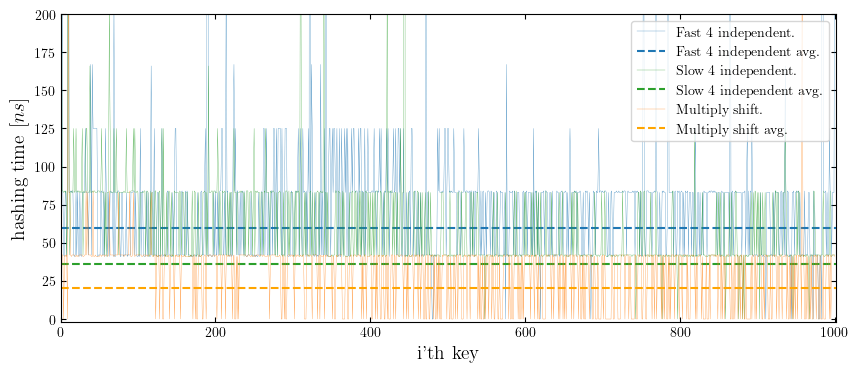

In [78]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

first_x_vals = 1000


ax.plot(n_keys[:first_x_vals], fast_4_independent[:first_x_vals],color='tab:blue', lw=0.2, label='Fast 4 independent.')
ax.hlines(fast_4_independent_avg,0,n_keys[first_x_vals],ls='--',color='tab:blue', label='Fast 4 independent avg.')

ax.plot(n_keys[:first_x_vals], slow_4_independent[:first_x_vals],color='tab:green', lw=0.2, label='Slow 4 independent.')
ax.hlines(slow_4_independent_avg,0,n_keys[first_x_vals],ls='--',color='tab:green', label='Slow 4 independent avg.')

ax.plot(n_keys[:first_x_vals], multiply_shift[:first_x_vals], lw=0.2, color='tab:orange',label='Multiply shift.')
ax.hlines(multiply_shift_avg,0,n_keys[first_x_vals],ls='--',color='orange', label='Multiply shift avg.')


ax.set_xlabel("i'th key", size=14)
ax.set_ylabel(r"hashing time $[ns]$", size=14)
ax.set_ylim(-2,200)
ax.set_xlim(0,n_keys[first_x_vals])

ax.legend()
plt.savefig("exercise_5.pdf")
plt.show()

In [79]:
FILENAME = "../Data/Exercise_7.txt"
data = np.loadtxt(fname=FILENAME, dtype=float)

n_keys = data[:,0].astype(int)
average_HWC_update_times = data[:,1].astype(float)
average_sketch_update_times_1 = data[:,2].astype(float)
average_sketch_update_times_2 = data[:,3].astype(float)
average_sketch_update_times_3 = data[:,4].astype(float)


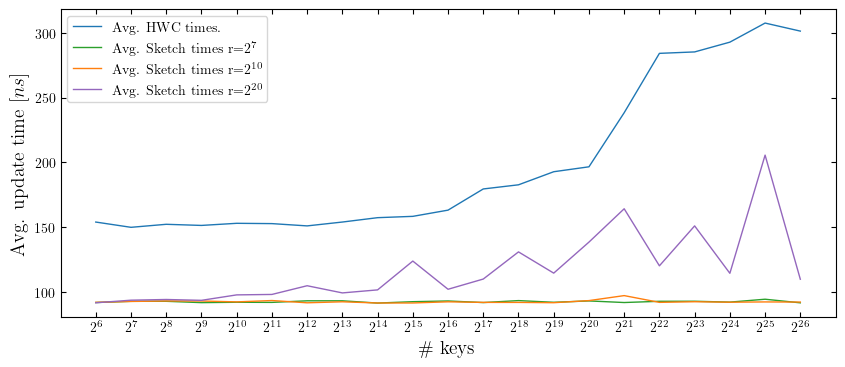

In [80]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(n_keys, average_HWC_update_times,color='tab:blue', lw=1, label='Avg. HWC times.')
ax.plot(n_keys, average_sketch_update_times_1,color='tab:green', lw=1, label=r'Avg. Sketch times r=$2^7$')
ax.plot(n_keys, average_sketch_update_times_2,color='tab:orange', lw=1, label=r'Avg. Sketch times r=$2^{10}$')
ax.plot(n_keys, average_sketch_update_times_3,color='tab:purple', lw=1, label=r'Avg. Sketch times r=$2^{20}$')

ax.set_xlabel("\# keys", size=14)
ax.set_ylabel(r"Avg. update time $[ns]$", size=14)
ax.set_xscale('log',base=2)
ax.set_xticks(n_keys)
ax.set_xticklabels(['$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$',
                    '$2^{20}$','$2^{21}$','$2^{22}$',
                    '$2^{23}$','$2^{24}$','$2^{25}$','$2^{26}$'])

ax.legend()
plt.savefig("exercise_7.pdf")
plt.show()

In [81]:
FILENAME = "../Data/Exercise_8.txt"
data = np.loadtxt(fname=FILENAME, dtype=float)

r_values = data[:,0].astype(int)
avg_relative_errs = data[:,1].astype(float)
max_relative_errs = data[:,2].astype(float)

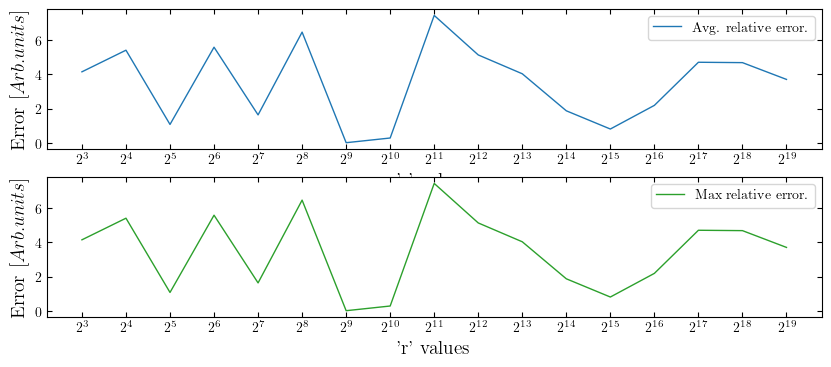

In [83]:
fig, ax = plt.subplots(2,1,figsize=(10,4))

ax[0].plot(r_values, avg_relative_errs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[0].legend()

ax[1].plot(r_values, max_relative_errs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[1].legend()

plt.savefig("exercise_8.pdf")
plt.show()

In [84]:
FILENAME = "../Data/Exercise_9.txt"
data = np.loadtxt(fname=FILENAME, dtype=float)

r_values = data[:,0].astype(int)
avg_relative_errs = data[:,1].astype(float)
max_relative_errs = data[:,2].astype(float)

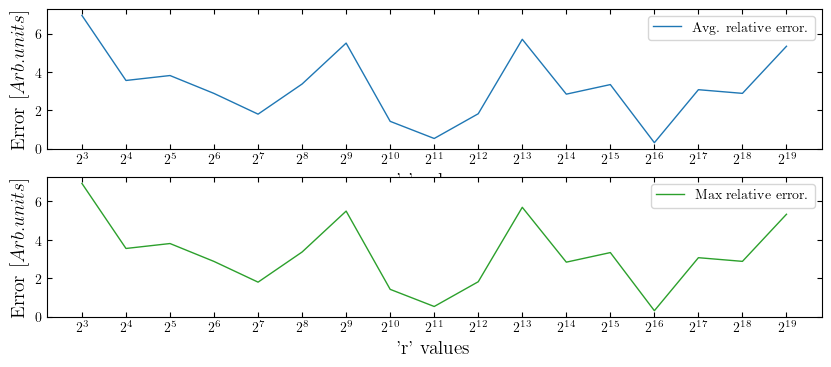

In [85]:
fig, ax = plt.subplots(2,1,figsize=(10,4))

ax[0].plot(r_values, avg_relative_errs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[0].legend()

ax[1].plot(r_values, max_relative_errs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels(['$2^3$','$2^4$',
                    '$2^5$','$2^6$','$2^7$',
                    '$2^8$','$2^9$','$2^{10}$',
                    '$2^{11}$','$2^{12}$','$2^{13}$',
                    '$2^{14}$','$2^{15}$','$2^{16}$',
                    '$2^{17}$','$2^{18}$','$2^{19}$'])
ax[1].legend()

plt.savefig("exercise_9.pdf")
plt.show()